In [1]:
import pandas as pd # For creating dataframes and calculating correlation matrices.
from pandas.api.types import CategoricalDtype # For correctly setting some dataframe colummns as being of categorical type

from pathlib import Path # For defining the path directory in which the data is stored

import seaborn as sn   # For creating visual representations
import matplotlib
import matplotlib.pyplot as plt # of correlation matrices.

import numpy as np #For numerical opertions

import networkx as nx
#import community as community_louvain
import matplotlib.cm as cm


In [2]:
cdata_mex_pairs=pd.read_csv('../output_data/complexity_data_mex_pairs_all.csv')

low_range = 0.5 # Strong transition
low_range_str = str(low_range).replace('.','_')
#RCA weighted metrics
cdata_mex_pairs['GPDperCAP_rca1']=cdata_mex_pairs['GPDperCAP']*cdata_mex_pairs['rca1']
cdata_mex_pairs['discovery_factor_rca1']=cdata_mex_pairs['discovery_factor_'+low_range_str]*cdata_mex_pairs['rca1']
cdata_mex_pairs['degree_centrality_rca1']=cdata_mex_pairs['degree_centrality']*cdata_mex_pairs['rca1']
cdata_mex_pairs['eigenvecor_centrality_rca1']=cdata_mex_pairs['eigenvecor_centrality']*cdata_mex_pairs['rca1']
cdata_mex_pairs['closeness_centrality_rca1']=cdata_mex_pairs['closeness_centrality']*cdata_mex_pairs['rca1']


cdata_mex_pairs_under_trans=cdata_mex_pairs.loc[cdata_mex_pairs['M_num_'+low_range_str].isin([0,1])]
cdata_mex_pairs_under_trans

Unnamed: 0.1  Unnamed: 0  year_pair location_code  Product  export  \
0                 0           0  2004_2009        Centro   112511     0.0   
2                 2           2  2004_2009        Centro   114111     0.0   
3                 3           3  2004_2009        Centro   114112     0.0   
4                 4           4  2004_2009        Centro   114113     0.0   
5                 5           5  2004_2009        Centro   114119   208.0   
...             ...         ...        ...           ...      ...     ...   
13563         13563       13563  2004_2019           Sur   561920     7.0   
13575         13575       13575  2004_2019           Sur   611211    17.0   
13600         13600       13600  2004_2019           Sur   621610     4.0   
13606         13606       13606  2004_2019           Sur   623111     4.0   
13659         13659       13659  2004_2019           Sur   811114   191.0   

            eci       pci   density       coi  ...  discovery_factor_0_95  \
0      1.332416 -0.095911  0.332567 -1.683670  ...               0.000000   
2      1.332416 -1.755006  0.250600 -1.683670  ...               0.000000   
3      1.332416 -1.061710  0.319716 -1.683670  ...               0.000000   
4      1.332416 -1.334214  0.325510 -1.683670  ...               0.000000   
5      1.332416 -2.993308  0.156146 -1.683670  ...               0.000000   
...         ...       ...       ...       ...  ...                    ...   
13563 -1.455974  1.327311  0.106335  0.562669  ...              11.021277   
13575 -1.455974  1.327311  0.106335  0.562669  ...              11.021277   
13600 -1.455974  1.327311  0.106335  0.562669  ...               0.816602   
13606 -1.455974  0.712639  0.159175  0.562669  ...               0.000000   
13659 -1.455974 -0.095911  0.167816  0.562669  ...               0.000000   

       discovery_factor_1  degree_centrality  eigenvecor_centrality  \
0                0.000000           0.793103               0.037885   
2                0.000000           0.602854               0.027091   
3                0.000000           0.858502               0.039375   
4                0.000000           0.743163               0.034190   
5                0.000000           0.223543               0.008535   
...                   ...                ...                    ...   
13563           11.021277           0.876338               0.040159   
13575           11.021277           0.876338               0.040159   
13600            0.816602           0.876338               0.040159   
13606            0.000000           0.963139               0.043085   
13659            0.000000           0.793103               0.037885   

       closeness_centrality  GPDperCAP_rca1  discovery_factor_rca1  \
0                  0.828571        0.000000                    0.0   
2                  0.715745        0.000000                    0.0   
3                  0.876042        0.000000                    0.0   
4                  0.795648        0.000000                    0.0   
5                  0.562918        0.004891                    0.0   
...                     ...             ...                    ...   
13563              0.889947        0.037781                    0.0   
13575              0.889947        0.057283                    0.0   
13600              0.889947        0.049788                    0.0   
13606              0.964450        0.040660                    0.0   
13659              0.828571        0.048660                    0.0   

       degree_centrality_rca1  eigenvecor_centrality_rca1  \
0                    0.000000                    0.000000   
2                    0.000000                    0.000000   
3                    0.000000                    0.000000   
4                    0.000000                    0.000000   
5                    0.007465                    0.000285   
...                       ...                         ...   
13563                0.256508       

In [3]:
Estados = cdata_mex_pairs['location_code'].unique()
Estados

array(['Centro', 'Centro-Norte', 'Norte', 'Sur'], dtype=object)

Centro


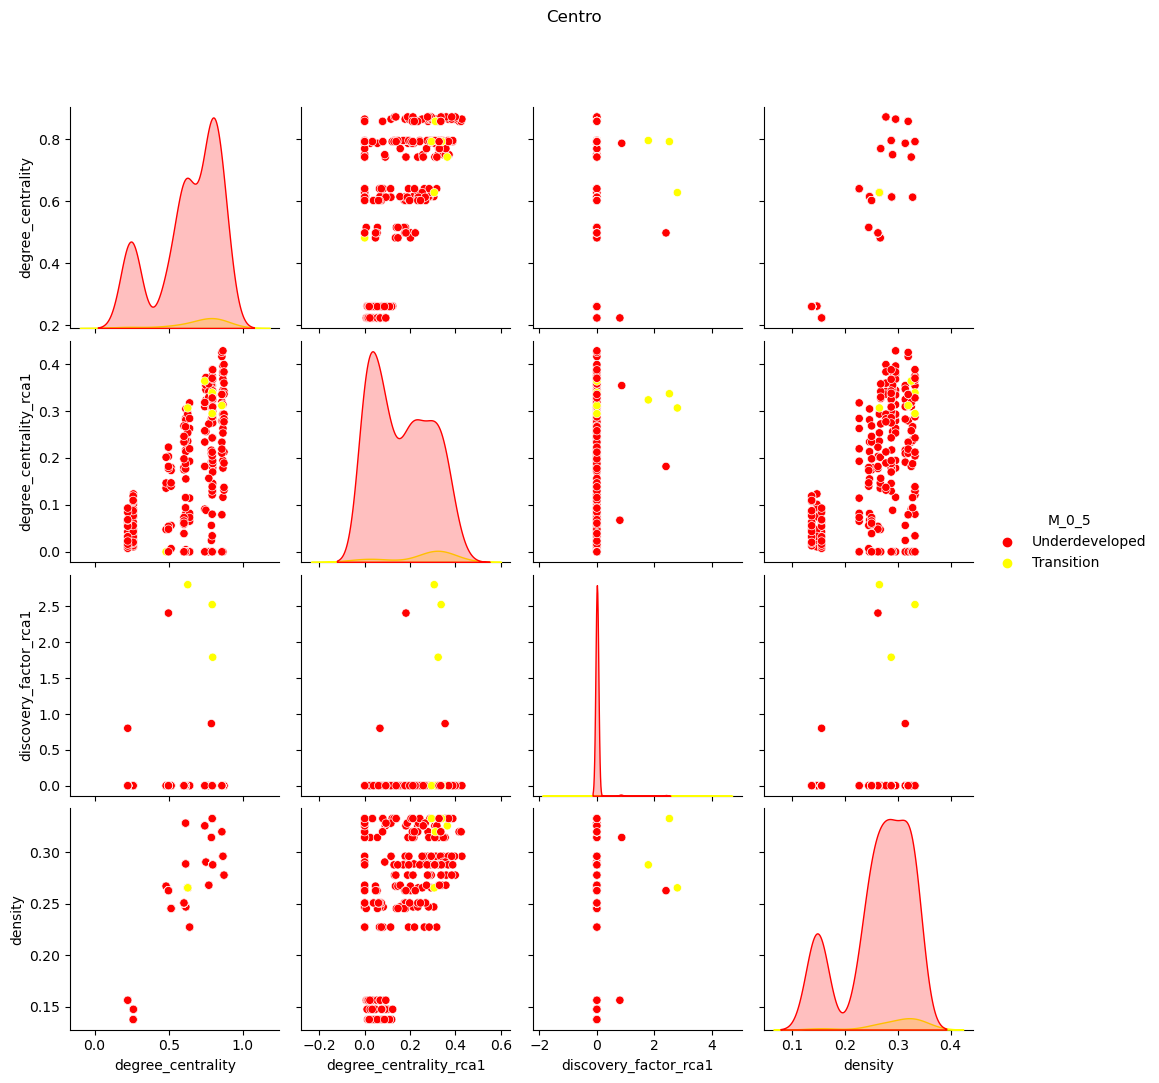

In [4]:
Edo = 'Centro'
Feature_array = ['degree_centrality','degree_centrality_rca1','discovery_factor_rca1','density','M_'+low_range_str]
Visualize_df = cdata_mex_pairs_under_trans[cdata_mex_pairs_under_trans['location_code'] == Edo][Feature_array]
print(Edo)
sn.pairplot(Visualize_df, hue='M_'+low_range_str,palette = {'Underdeveloped':'red','Transition':'yellow'}).fig.suptitle(Edo, y=1.08)
plt.show()


Centro


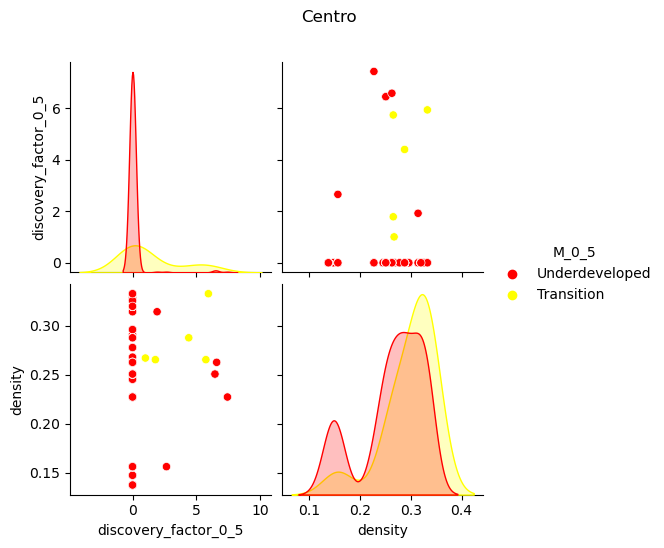

Centro-Norte


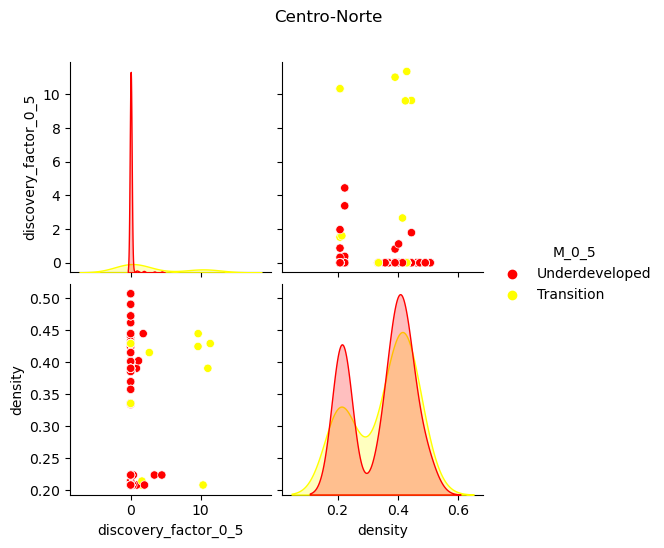

Norte


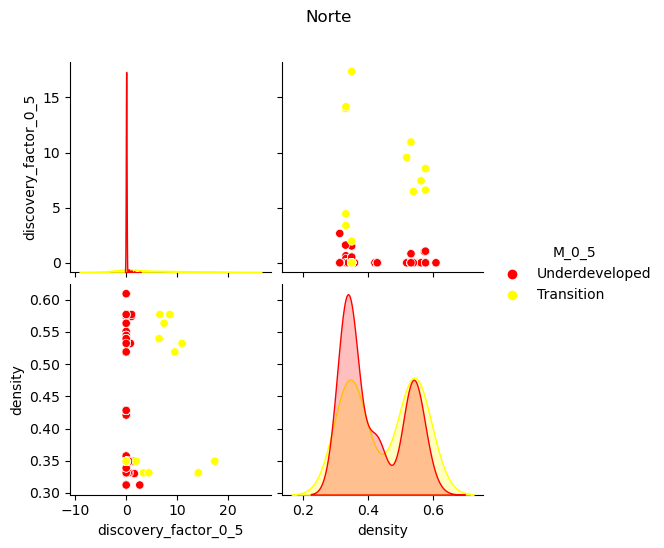

Sur


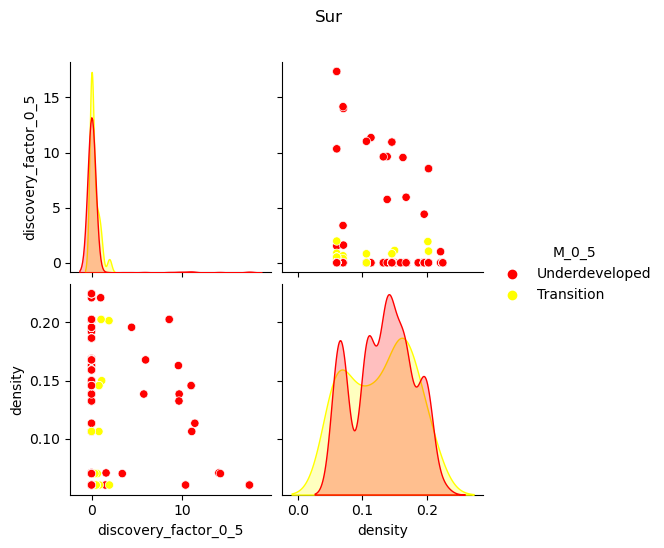

In [5]:
# Feature_array = ['degree_centrality_rca1','discovery_factor_rca1','density','M_0_5']
# Feature_array = ['degree_centrality','discovery_factor_rca1','density','M_'+low_range_str]
Feature_array = ['discovery_factor_'+low_range_str,'density','M_'+low_range_str]

for Edo in Estados:
    Visualize_df = cdata_mex_pairs_under_trans[cdata_mex_pairs_under_trans['location_code'] == Edo][Feature_array]
   # g = sn.pairplot(Visualize_df, hue="M_0_5")
  #  g.fig.suptitle(Edo, y=1.08) # y= some height>1
    print(Edo)
    sn.pairplot(Visualize_df, hue='M_'+low_range_str,palette = {'Underdeveloped':'red','Transition':'yellow'},diag_kind = 'kde',diag_kws = dict(common_norm=False)).fig.suptitle(Edo, y=1.08)
    plt.show()

Centro


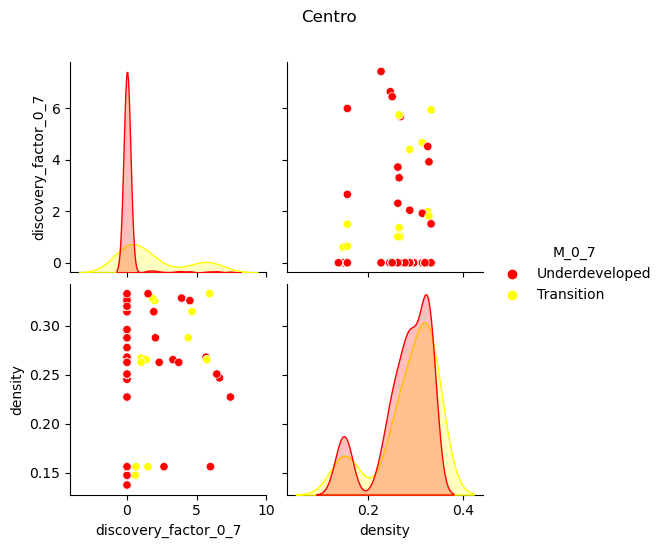

Centro-Norte


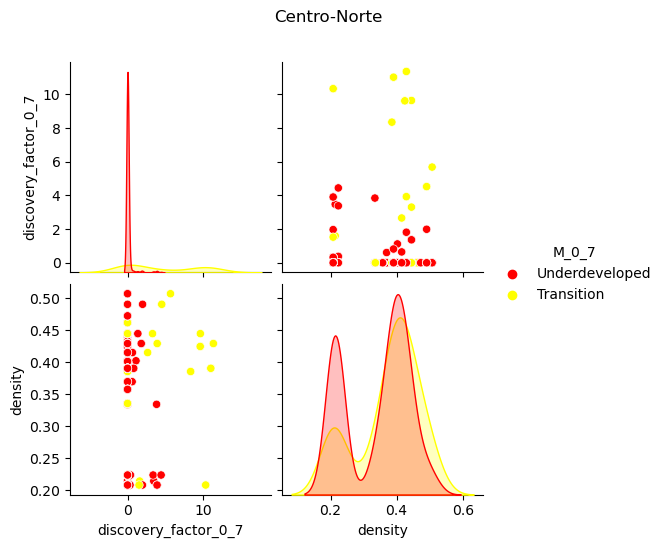

Norte


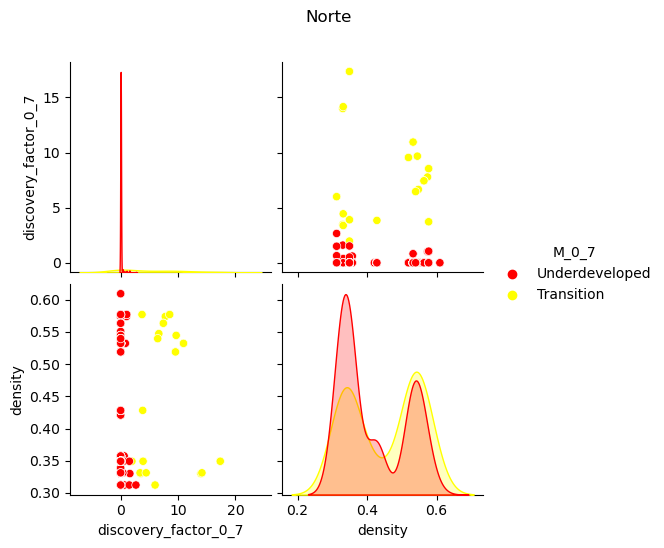

Sur


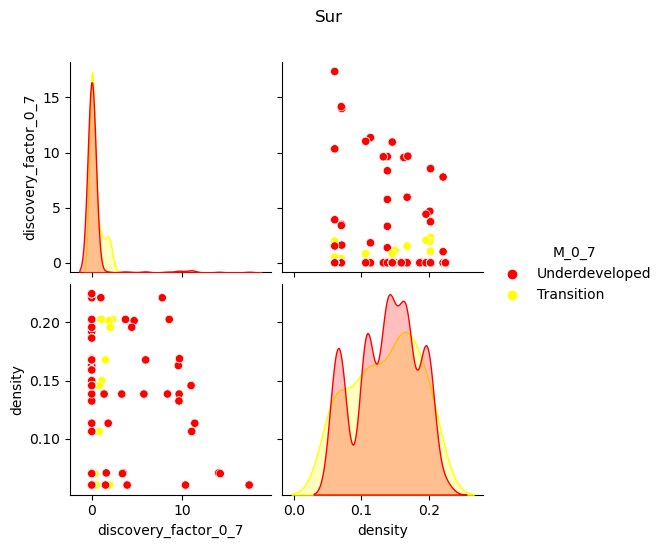

In [6]:
cdata_mex_pairs=pd.read_csv('../output_data/complexity_data_mex_pairs_all.csv')

low_range = 0.7
low_range_str = str(low_range).replace('.','_')
#RCA weighted metrics
cdata_mex_pairs['GPDperCAP_rca1']=cdata_mex_pairs['GPDperCAP']*cdata_mex_pairs['rca1']
cdata_mex_pairs['discovery_factor_rca1']=cdata_mex_pairs['discovery_factor_'+low_range_str]*cdata_mex_pairs['rca1']
cdata_mex_pairs['degree_centrality_rca1']=cdata_mex_pairs['degree_centrality']*cdata_mex_pairs['rca1']
cdata_mex_pairs['eigenvecor_centrality_rca1']=cdata_mex_pairs['eigenvecor_centrality']*cdata_mex_pairs['rca1']
cdata_mex_pairs['closeness_centrality_rca1']=cdata_mex_pairs['closeness_centrality']*cdata_mex_pairs['rca1']


cdata_mex_pairs_under_trans=cdata_mex_pairs.loc[cdata_mex_pairs['M_num_'+low_range_str].isin([0,1])]

# Feature_array = ['degree_centrality','discovery_factor_rca1','density','M_'+low_range_str]

Feature_array = ['discovery_factor_'+low_range_str,'density','M_'+low_range_str]

for Edo in Estados:
    Visualize_df = cdata_mex_pairs_under_trans[cdata_mex_pairs_under_trans['location_code'] == Edo][Feature_array]
   # g = sn.pairplot(Visualize_df, hue="M_0_5")
  #  g.fig.suptitle(Edo, y=1.08) # y= some height>1
    print(Edo)
    sn.pairplot(Visualize_df, hue='M_'+low_range_str,palette = {'Underdeveloped':'red','Transition':'yellow'},diag_kind = 'kde',diag_kws = dict(common_norm=False)).fig.suptitle(Edo, y=1.08)
    plt.show()

Centro


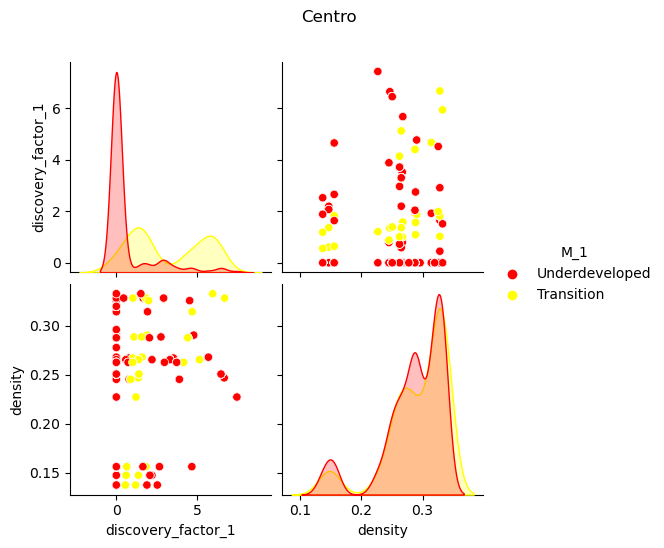

Centro-Norte


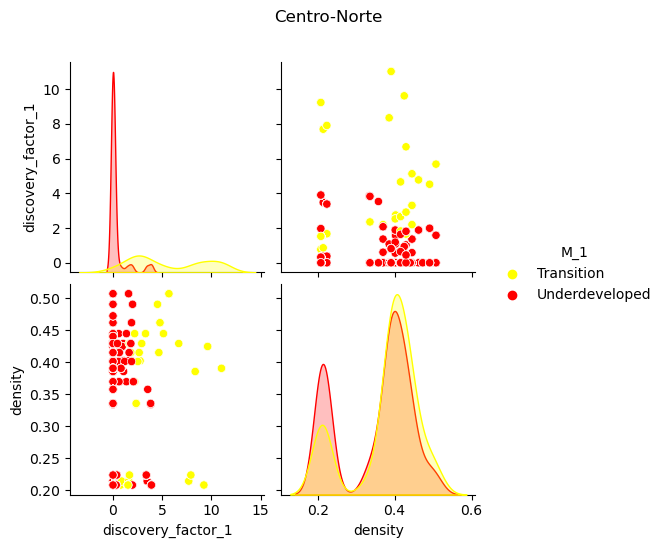

Norte


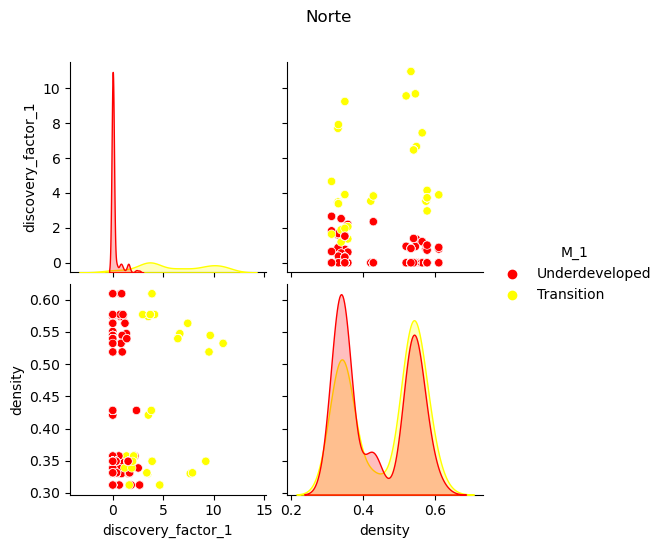

Sur


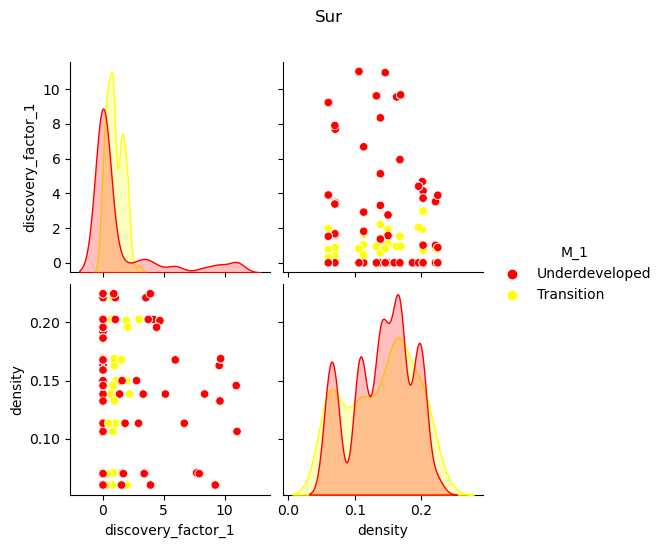

In [7]:
cdata_mex_pairs=pd.read_csv('../output_data/complexity_data_mex_pairs_all.csv')

low_range = 1
low_range_str = str(low_range).replace('.','_')
#RCA weighted metrics
cdata_mex_pairs['GPDperCAP_rca1']=cdata_mex_pairs['GPDperCAP']*cdata_mex_pairs['rca1']
cdata_mex_pairs['discovery_factor_rca1']=cdata_mex_pairs['discovery_factor_'+low_range_str]*cdata_mex_pairs['rca1']
cdata_mex_pairs['degree_centrality_rca1']=cdata_mex_pairs['degree_centrality']*cdata_mex_pairs['rca1']
cdata_mex_pairs['eigenvecor_centrality_rca1']=cdata_mex_pairs['eigenvecor_centrality']*cdata_mex_pairs['rca1']
cdata_mex_pairs['closeness_centrality_rca1']=cdata_mex_pairs['closeness_centrality']*cdata_mex_pairs['rca1']


cdata_mex_pairs_under_trans=cdata_mex_pairs.loc[cdata_mex_pairs['M_num_'+low_range_str].isin([0,1])]

Feature_array = ['degree_centrality','discovery_factor_rca1','density','M_'+low_range_str]
Feature_array = ['discovery_factor_'+low_range_str,'density','M_'+low_range_str]

for Edo in Estados:
    Visualize_df = cdata_mex_pairs_under_trans[cdata_mex_pairs_under_trans['location_code'] == Edo][Feature_array]
   # g = sn.pairplot(Visualize_df, hue="M_0_5")
  #  g.fig.suptitle(Edo, y=1.08) # y= some height>1
    print(Edo)
    sn.pairplot(Visualize_df, hue='M_'+low_range_str,palette = {'Underdeveloped':'red','Transition':'yellow'},diag_kind = 'kde',diag_kws = dict(common_norm=False)).fig.suptitle(Edo, y=1.08)
    plt.show()

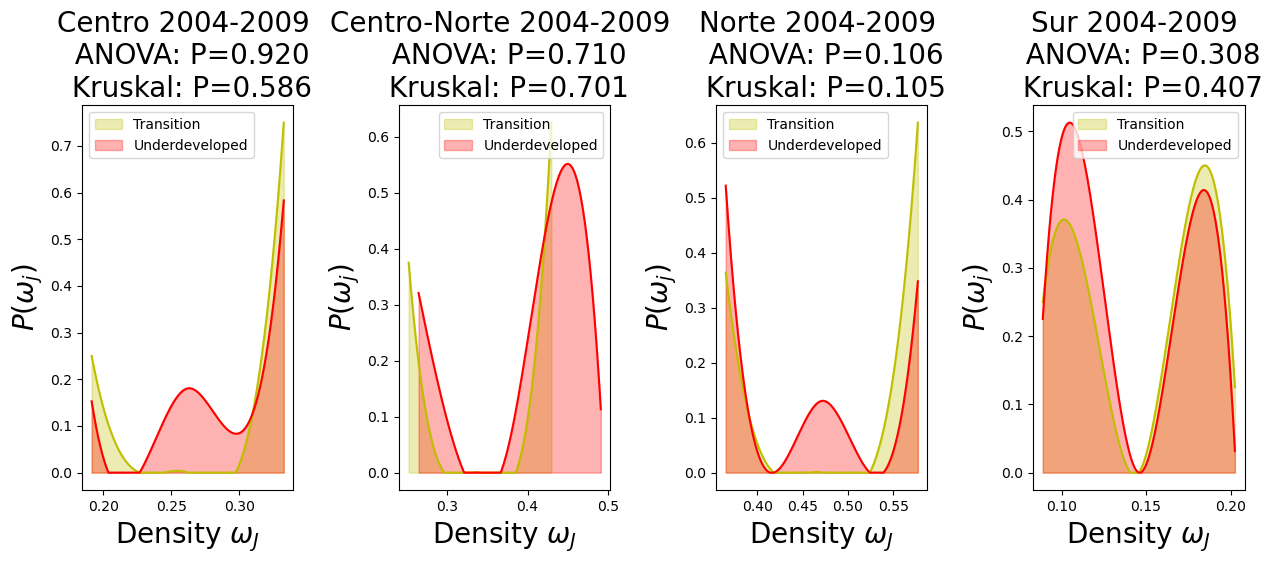

Estado    Periodo  ANOVA_flag  Kruskal_flag
0        Centro  2004-2009           0             0
1  Centro-Norte  2004-2009           0             0
2         Norte  2004-2009           0             0
3           Sur  2004-2009           0             0

In [8]:
from scipy.stats import f_oneway
from scipy.stats import kruskal
from scipy.interpolate import make_interp_spline


fig, axs = plt.subplots(1,4, figsize=(15, 5), facecolor='w', edgecolor='k')
# fig, axs = plt.subplots(3,3, figsize=(15, 15), facecolor='w', edgecolor='k')

fig.subplots_adjust(hspace = 0.5, wspace=0.5)

axs = axs.ravel()
cdata_mex_pairs=pd.read_csv('../output_data/complexity_data_mex_pairs_all.csv')

low_range = 0.5
low_range_str = str(low_range).replace('.','_')
#RCA weighted metrics
cdata_mex_pairs['GPDperCAP_rca1']=cdata_mex_pairs['GPDperCAP']*cdata_mex_pairs['rca1']
cdata_mex_pairs['discovery_factor_rca1']=cdata_mex_pairs['discovery_factor_'+low_range_str]*cdata_mex_pairs['rca1']
cdata_mex_pairs['degree_centrality_rca1']=cdata_mex_pairs['degree_centrality']*cdata_mex_pairs['rca1']
cdata_mex_pairs['eigenvecor_centrality_rca1']=cdata_mex_pairs['eigenvecor_centrality']*cdata_mex_pairs['rca1']
cdata_mex_pairs['closeness_centrality_rca1']=cdata_mex_pairs['closeness_centrality']*cdata_mex_pairs['rca1']


cdata_mex_pairs_under_trans=cdata_mex_pairs.loc[cdata_mex_pairs['M_num_'+low_range_str].isin([0,1])]

year_pair='2004_2009'
year1=int(year_pair[0:4])
year2=int(year_pair[5:])

year_df = cdata_mex_pairs_under_trans[cdata_mex_pairs_under_trans['year_pair'] == year_pair]

metric = 'density'


est_per_p_val=[]


for i,Estado in enumerate(Estados):
    
  
    
    #Get metric of transition and underdeveloped products
    
    state_df = year_df[year_df['location_code'] == Estado]
    
    dens_trans = state_df[state_df['M_num_'+low_range_str] == 1][metric].values
    
    dens_under = state_df[state_df['M_num_'+low_range_str] == 0][metric].values
    
    
    
    bins=5
    
    #Histogram desity

    count_dens_trans,base_dens_trans = np.histogram(dens_trans, bins=bins,density=False)
    
    #Probability
    prob_dens_trans = count_dens_trans/len(dens_trans)

    count_dens_under,base_dens_under = np.histogram(dens_under, bins=bins,density=False)
    #Probability
    
    prob_dens_under = count_dens_under/len(dens_under)

    f_stat_ANOVA, p_valor_ANOVA = f_oneway(dens_trans, dens_under)
    f_stat_kruskal, p_valor_kruskal = kruskal(dens_trans, dens_under)


    #print("Estadístico F:", dens_trans)
    #print("Valor P:", dens_under)

    #plt.plot(base_dens_trans[1:len(base_dens_trans)],prob_dens_trans,'y',label= 'Transition')

    #plt.plot(base_dens_under[1:len(base_dens_under)],prob_dens_under,'r',label= 'Underdeveloped')

    #plt.xlabel(r'$\omega_j$',size=20)
    #plt.ylabel(r'$P(\omega_j)$',size=20)
    #plt.title(Estado+f' {year1}-{year2} \n ANOVA: P={p_valor_ANOVA:.3f}\n Kruskal: P={p_valor_kruskal:.3f}',size=20)
    #plt.legend()
    #plt.show()
    
    barx_sub = 3
    wx_trans = (max(base_dens_under)-min(base_dens_under))/barx_sub
    x_trans = base_dens_trans[1:len(base_dens_trans)]
    y_trans = prob_dens_trans
    spline_trans = make_interp_spline(x_trans, y_trans, k=3)
    
    # Generate new x values for a smooth curve
    x_smooth_trans = np.linspace(x_trans.min(), x_trans.max(), 500)
    y_smooth_trans = spline_trans(x_smooth_trans)
    y_smooth_trans = [0 if x < 0 else x for x in y_smooth_trans]

    # Plot the smooth curve
    axs[i].plot(x_smooth_trans, y_smooth_trans,'y')
    axs[i].fill_between(x_smooth_trans, y_smooth_trans, color='y', alpha=0.3,label= 'Transition' )

    
    #axs[i].plot(base_dens_trans[1:len(base_dens_trans)],prob_dens_trans,'y')
    #axs[i].bar(base_dens_trans[1:len(base_dens_trans)],prob_dens_trans,
               #alpha=0.3,width=wx_trans,color='y',label= 'Transition')
    
    wx_under = (max(base_dens_under)-min(base_dens_under))/barx_sub

    
    x_under = base_dens_under[1:len(base_dens_under)]
    y_under = prob_dens_under
    spline_under = make_interp_spline(x_under, y_under, k=3)
    
    # Generate new x values for a smooth curve
    x_smooth_under = np.linspace(x_under.min(), x_under.max(), 500)
    y_smooth_under = spline_under(x_smooth_under)
    y_smooth_under = [0 if x < 0 else x for x in y_smooth_under]

    # Plot the smooth curve
    axs[i].plot(x_smooth_under, y_smooth_under,'r')
    axs[i].fill_between(x_smooth_under, y_smooth_under, color='r', alpha=0.3,label= 'Underdeveloped' )
    
    #axs[i].plot(base_dens_under[1:len(base_dens_under)],prob_dens_under,'r')
    #axs[i].bar(base_dens_under[1:len(base_dens_under)],prob_dens_under,
     #          alpha=0.3,width=wx_under,color='r',label= 'Underdeveloped')
    
    
    axs[i].set_xlabel(r'Density $\omega_J$',size=20)
    axs[i].set_ylabel(r'$P(\omega_j)$',size=20)
    axs[i].set_title(Estado+f' {year1}-{year2} \n ANOVA: P={p_valor_ANOVA:.3f}\n Kruskal: P={p_valor_kruskal:.3f}'
                     ,size=20)
    axs[i].legend()
    
    p_anova_flag=1
    if p_valor_ANOVA>0.05:
        #print(Estado+f' {year1}-{year2} \n ANOVA: P={p_valor_ANOVA:.3f}\n Kruskal: P={p_valor_kruskal:.3f}')
        p_anova_flag=0
        
    p_kruskal_flag=1
    if p_valor_kruskal>0.05:
        #print(Estado+f' {year1}-{year2} \n ANOVA: P={p_valor_ANOVA:.3f}\n Kruskal: P={p_valor_kruskal:.3f}')
        p_kruskal_flag=0
    
    period_str=f'{year1}-{year2}'
        
    est_per_p_val.append([Estado,period_str,p_anova_flag,p_kruskal_flag])
    
plt.show()
    
df_statistics=pd.DataFrame(est_per_p_val,columns=['Estado','Periodo','ANOVA_flag','Kruskal_flag'])
df_statistics
